# Neural Network

In [ ]:
!python --version

Python 3.10.12


In [ ]:
import torch
print(torch.__version__)

2.3.0+cu121


## Task-0: Download and Process MNIST

In [ ]:
# import libraries
import torch
import torchvision
from torchvision import transforms

# define root path
path = r"/content"

# define augmentations on training and validation data
train_transforms = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomCrop((28,28), pad_if_needed=True),
    transforms.ToTensor(),
    transforms.Normalize((0.5), (0.5))
])

# define augmentations on test data
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5), (0.5))
])

# download and apply augmentations on MNIST dataset
mnist_data = torchvision.datasets.MNIST(
    root=path,
    train=True,
    download=True,
    transform=train_transforms)

# download and apply augmentations on MNIST test set
mninst_test_data = torchvision.datasets.MNIST(
    root=path,
    train=False,
    download=True,
    transform=test_transforms)

# print size of the dataset
print(f'MNIST size: {len(mnist_data)}')
print(f'Test size: {len(mninst_test_data)}')

In [ ]:
from torch.utils.data import random_split

# define size of training and validation sets
train_size = 50000
val_size = 10000

# split MNIST dataset into training and validation sets
train_data, val_data = random_split(mnist_data, [train_size, val_size])

# print size of the training, testing and validation sets
print(f'Train size: {len(train_data)}')
print(f'Test size: {len(mninst_test_data)}')
print(f'Validation size: {len(val_data)}')

## Task-1: Create data loaders and Plot images

In [ ]:
from torch.utils.data import DataLoader

# create data loader for training, testing, and validation sets
train_loader = DataLoader(train_data, 64)
test_loader = DataLoader(mninst_test_data, 64)
val_loader = DataLoader(val_data, 64)

In [ ]:
import seaborn as sns
import matplotlib as mlp
from collections import Counter
from matplotlib import pyplot as plt

mlp.style.use('seaborn-v0_8')


def get_unique_classes(dataloader):
    """
    Extracts unique classes from the dataloader.
    Parameters:
        dataloader (torch.utils.data.DataLoader): Data loader to obtain unique classes.
    Returns:
        unique_labels: Set of unique classes.
    """
    unique_labels = set()
    for _, labels in dataloader:
        unique_labels.update(labels.numpy())
    return unique_labels

def plot_class_distribution(data_loader, title=None):
    """
    Plots class distribution of given dataloader
    Parameters:
        data_loader (torch.utils.data.Dataloader): Data loader to obtain the class distribution.
        title (str): Title for the plot. Default is None.
    """
    class_counter = Counter()  # counter to store class counts

    for _, labels in data_loader:
        class_counter.update(labels.numpy())  # update counter with class labels

    class_counts = [class_counter[i] for i in range(len(get_unique_classes(data_loader)))]
    class_labels = [str(i) for i in get_unique_classes(data_loader)]

    data = {'classes':class_labels, 'counts':class_counts}

    plt.figure(figsize=(8,4))
    sns.barplot(x='classes', y='counts', data=data, color='green', saturation=0.1)
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.show()

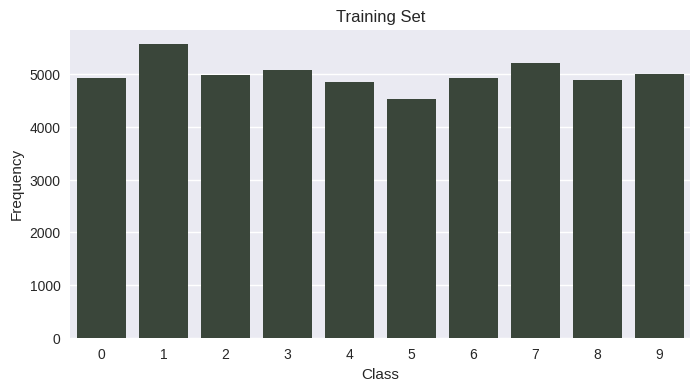

In [ ]:
# plot class distribution of training set
plot_class_distribution(train_loader, 'Training Set')

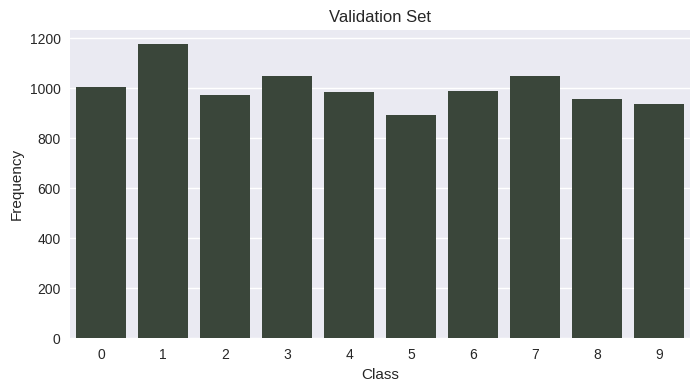

In [ ]:
# plot class distribution of validation set
plot_class_distribution(val_loader, 'Validation Set')

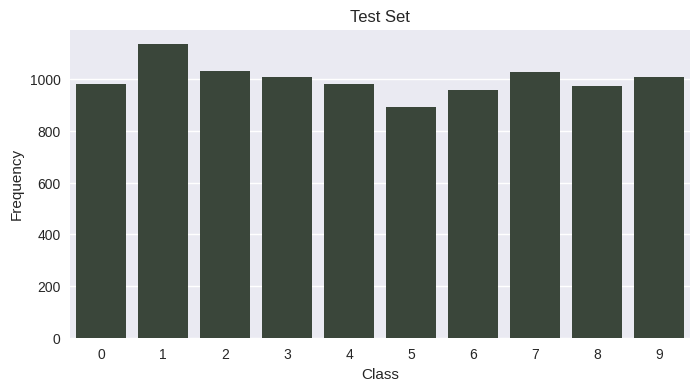

In [ ]:
# plot class distribution of testing set
plot_class_distribution(test_loader, 'Test Set')

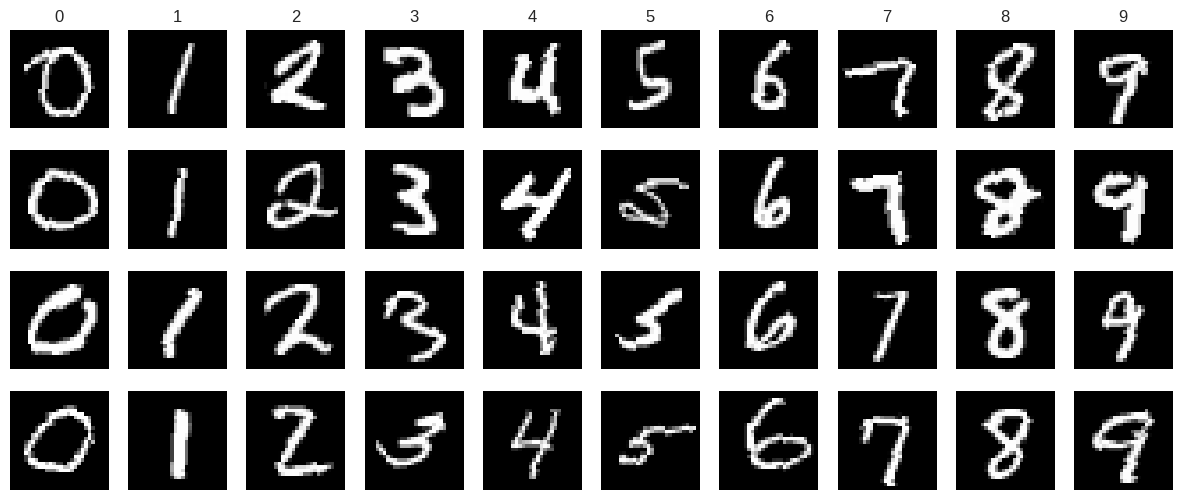

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_images(dataloader, num_images=1):
    """
    Plots samples of each class from given dataloader.
    Parameters:
        dataloader (torch.utils.data.DataLoader): Data Loader to obtain samples
        num_images (int): Number of samples to plot for each class. Default is 1.
    """

    # dictionary to store class counts
    class_counts = {i:0 for i in range(len(get_unique_classes(train_loader)))}
    fig, axes = plt.subplots(num_images, len(class_counts), figsize=(15, 1.5*num_images))

    # start data loop
    for images, labels in dataloader:
        for image, label in zip(images, labels):

            # check if class is already plotted
            if class_counts[label.item()] < num_images:
                row = class_counts[label.item()]
                if num_images > 1:
                    ax = axes[row, label.item()]
                else:
                    ax = axes[label.item()]

                image = image.numpy() # convert image to numpy array
                image = image.transpose((1, 2, 0))  # conversion from (C, H, W) to (H, W, C)
                image = 0.5 * image + 0.5  # reverse normalisation to obtain original image

                ax.imshow(image.squeeze(), cmap='gray')

                # set title for first image of each class
                if class_counts[label.item()]==0:
                    ax.set_title(label.item())
                ax.axis('off')

                class_counts[label.item()] += 1

            if all(count >= num_images for count in class_counts.values()):
                break

        if all(count >= num_images for count in class_counts.values()):
            break

    plt.show()

# plot images for each category
plot_images(train_loader, 4)

## Task-2: Multi-Layer Perceptron

In [ ]:
import torch.nn as nn

class MultiLayerPerceptron(nn.Module):
    """
    A multi-layer perceptron model for image classification.
    """
    def __init__(self):
        """
        Initializes the MultiLayerPerceptron model.
        """
        super(MultiLayerPerceptron, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, image):
        """
        Forward pass of the model.
        Parameters:
            image (torch.Tensor): Input image tensor.
        Returns:
            image (torch.Tensor): Output image tensor.
        """
        image = image.view(-1, 28*28)
        image = self.relu(self.fc1(image))
        image = self.relu(self.fc2(image))
        image = self.fc3(image)
        return image

# create instance of the MultiLayerPerceptron model
model = MultiLayerPerceptron()

In [ ]:
# calculate total number of parameters and number of trainable parameters
total_num_parameters = sum(param.numel() for param in model.parameters())
num_trainable_parameters = sum(param.numel() for param in model.parameters() if param.requires_grad)

print(f'Total number of parameters: {total_num_parameters}')
print(f'Number of trainable parameters: {num_trainable_parameters}')

Total number of parameters: 235146
Number of trainable parameters: 235146


## Task-3: Model Training and Evaluation

In [ ]:
import os
import torch.optim as optim

# define hyperparameters
epochs = 5
criterion = nn.CrossEntropyLoss()
model_path = os.path.join(path, 'model.pth')
optimizer = optim.Adam(model.parameters(), lr=10e-4)

def train_model(model, train_loader, val_loader, epochs=5):
    """
    Trains the model on the training set and evaluate on the validation set.
    Parameters:
        model (torch.nn.Module): The model to be trained.
        train_loader (torch.utils.data.DataLoader): DataLoader for training data.
        val_loader (torch.utils.data.DataLoader): DataLoader for validation data.
        epochs (int): Number of epochs for training. Default is 5.
    Returns:
        train_losses (list): List of training losses.
        train_accuracies (list): List of training accuracies.
        val_losses (list): List of validation losses.
        val_accuracies (list): List of validation accuracies.
    """
    best_val_accuracy = 0.
    train_losses, val_losses = [], []
    train_accuracies,val_accuracies = [], []

    for epoch in range(epochs):
        print(f'Epoch {epoch+1}/{epochs}: ')

        # set the model for training
        model.train()
        running_loss = 0.
        running_correct = 0
        total_count = 0

        # start the train loop
        for images, labels in train_loader:
            optimizer.zero_grad()  # set the model parameters to zero
            outputs = model(images)  # forward pass
            logits = criterion(outputs, labels)  # calculate loss
            logits.backward()  # backward pass
            optimizer.step()  # optimise the model parameters

            running_loss += logits.item()  # add the loss to the running total
            _, predicted =  torch.max(outputs, 1)  # find predictions
            total_count += labels.size(0)  # count total samples
            running_correct += (predicted == labels).sum().item()  # count correct samples

        # calculate training loss and accuracy
        train_loss = running_loss / len(train_loader)
        train_accuracy = running_correct / total_count

        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)

        # set the model for evaluation
        model.eval()
        running_loss = 0.
        running_correct = 0
        total_count = 0

        # disable gradient calculation
        with torch.no_grad():
            # start the validation loop
            for images, labels in val_loader:
                outputs = model(images)  # forward pass
                logits = criterion(outputs, labels)  # calculate loss

                running_loss += logits.item()  #  add the loss the running loss
                _, predictions = torch.max(outputs, 1)  # find predictions
                total_count += labels.size(0)  # count total samples
                running_correct += (predictions == labels).sum().item()  # count correct samples

        # calculate validation loss and accuracy
        val_loss = running_loss / len(val_loader)
        val_accuracy = running_correct / total_count

        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        # save best model based on validation accuracy
        if val_accuracy > best_val_accuracy:
            print(f'Val Accurcy improved from {best_val_accuracy:.4} to {val_accuracy:.4}, saving model to {model_path}')
            best_val_accuracy = val_accuracy
            torch.save(model.state_dict(), model_path)
        else:
            print(f'Val Accurcy did not improve from {best_val_accuracy}')

        print(f'Loss: {train_loss:.4} - Accuracy: {train_accuracy:.4} - Val Loss: {val_loss:.4} - Val Accuracy: {val_accuracy:.4}')

    return train_losses, train_accuracies, val_losses, val_accuracies

# train the model
train_losses, train_accuracies, val_losses, val_accuracies = train_model(model, train_loader, val_loader, epochs=epochs)

Epoch 1/5: 
Val Accurcy improved from 0.0 to 0.941, saving model to /content/model.pth
Loss: 0.2934 - Accuracy: 0.9102 - Val Loss: 0.1892 - Val Accuracy: 0.941
Epoch 2/5: 
Val Accurcy improved from 0.941 to 0.9498, saving model to /content/model.pth
Loss: 0.1759 - Accuracy: 0.9448 - Val Loss: 0.1569 - Val Accuracy: 0.9498
Epoch 3/5: 
Val Accurcy improved from 0.9498 to 0.9559, saving model to /content/model.pth
Loss: 0.1351 - Accuracy: 0.9569 - Val Loss: 0.1402 - Val Accuracy: 0.9559
Epoch 4/5: 
Val Accurcy did not improve from 0.9559
Loss: 0.1128 - Accuracy: 0.9636 - Val Loss: 0.1443 - Val Accuracy: 0.9534
Epoch 5/5: 
Val Accurcy improved from 0.9559 to 0.96, saving model to /content/model.pth
Loss: 0.1006 - Accuracy: 0.9679 - Val Loss: 0.1256 - Val Accuracy: 0.96


## Task-4: Model Testing and Evaluation

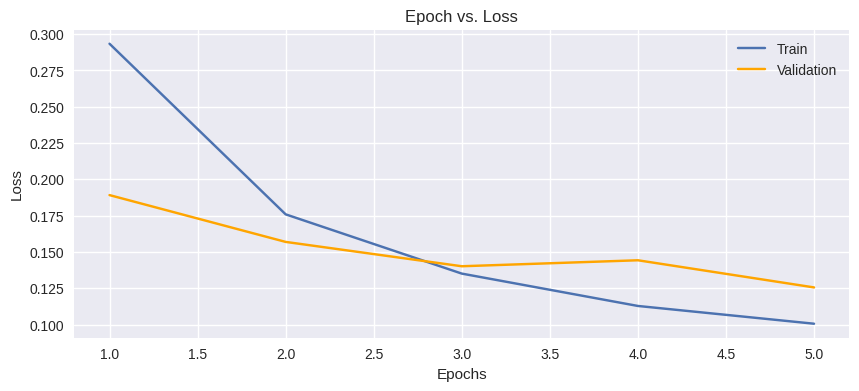

In [ ]:
import matplotlib.pyplot as plt

# plot the model loss on training and validation sets over epochs
epochs = 5
epochs = list(i+1 for i in range(epochs))

plt.figure(figsize=(10, 4))
plt.plot(epochs, train_losses, label='Train')
plt.plot(epochs, val_losses, label='Validation', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epoch vs. Loss')
plt.legend()
plt.show()

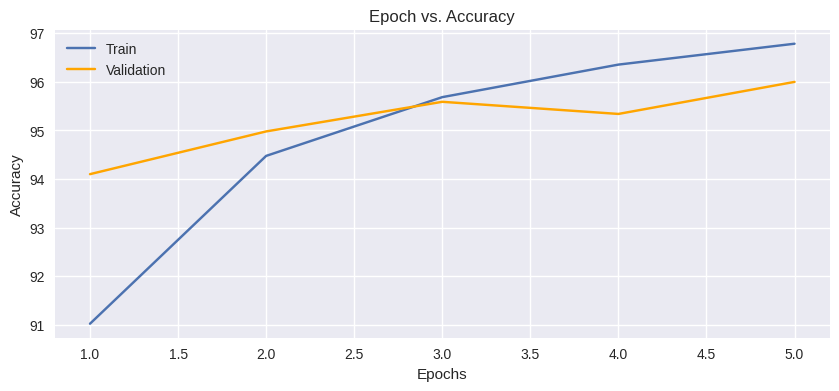

In [ ]:
# convert training and validation accuracy to percentage
train_accuracies = [accuracy*100. for accuracy in train_accuracies]
val_accuracies = [accuracy*100 for accuracy in val_accuracies]

# plot the model accuracy on training and validation sets over epochs
plt.figure(figsize=(10, 4))
plt.plot(epochs, train_accuracies, label='Train')
plt.plot(epochs, val_accuracies, label='Validation', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Epoch vs. Accuracy')
plt.legend()
plt.show()

In [ ]:
import torch

def test_model(model, test_loader):
    """
    Tests the model on the test set.
    Parameters:
        model (torch.nn.Module): The model to be tested.
        test_loader (torch.utils.data.DataLoader): DataLoader for test data.
    Returns:
        original_labels (list): List of true labels.
        predicted_labels (list): List of predicted labels.
        test_loss (float): Loss of the model on the test set.
    """

    # set the model for evaluation
    model.eval()

    running_loss = 0.

    original_labels = []
    predicted_labels = []

    # disable gradient calculation
    with torch.no_grad():
        # start the test loop
        for images, labels in test_loader:
            outputs = model(images) # forward pass
            logits = criterion(outputs, labels)  # calculate loss

            running_loss += logits.item()  # add the loss to the running total
            _, predictions = torch.max(outputs, 1)  # find predictions
            original_labels.extend(labels.numpy())  # add true labels to the list
            predicted_labels.extend(predictions.numpy())  # add predicted labels to the list

    # calculate tess loss
    test_loss = running_loss / len(test_loader)

    return original_labels, predicted_labels, test_loss

# test the model
original_labels, predicted_labels, test_loss = test_model(model, test_loader)

In [ ]:
# convert original and predicted labels to numpy array
original_labels = np.array(original_labels)
predicted_labels = np.array(predicted_labels)

# calculate test accurayc
test_accuracy = np.sum(original_labels == predicted_labels) / len(mninst_test_data)

# print accuracy and loss of test set
print(f'Test accuracy: {test_accuracy * 100.}')
print(f'Test Loss: {test_loss:.4}')

Test accuracy: 96.48
Test Loss: 0.1109


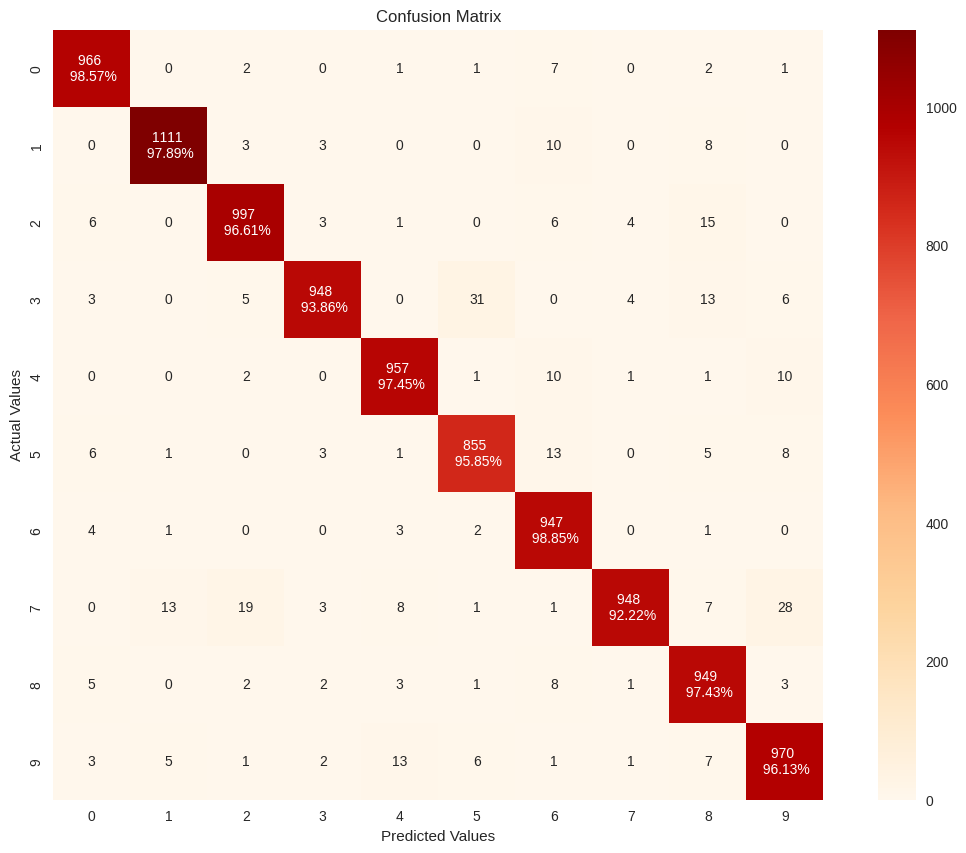

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# define category labels
category_labels = list(np.unique(original_labels))

def plot_confusion_matrix(original_labels, predicted_labels, category_labels):
    """
    Plots confusion matrix.
    Parameters:
        original_labels (numpy.ndarray): Array of true labels.
        predicted_labels (numpy.ndarray): Array of predicted labels.
        category_labels (list): List of category labels.
    """

    # compute confusion matrix
    conf_matrix = confusion_matrix(original_labels, predicted_labels)
    counts = conf_matrix.flatten()

    # calculate percentage for each category
    percentages = conf_matrix / np.sum(conf_matrix, axis=1, keepdims=True).flatten()

    # prepare labels for heatmap
    labels = []
    for i in range(len(category_labels)):
        for j in range(len(category_labels)):
            if i==j:
                label = f'{conf_matrix[i, j]} \n {percentages[i, j]:.2%}'  # for diagonal elements
            else:
                label = f'{conf_matrix[i, j]}'   # for non-diagonal elements
            labels.append(label)

    # reshape labels
    labels = np.asarray(labels).reshape(len(category_labels), len(category_labels))

    # plot the heatmap
    plt.figure(figsize=(14, 10))
    ax = sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='OrRd', square=True, xticklabels=category_labels, yticklabels=category_labels)
    ax.set_title('Confusion Matrix', font_size=15)
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('Actual Values')
    plt.show()

# plot the confusion matrix
plot_confusion_matrix(original_labels, predicted_labels, category_labels)

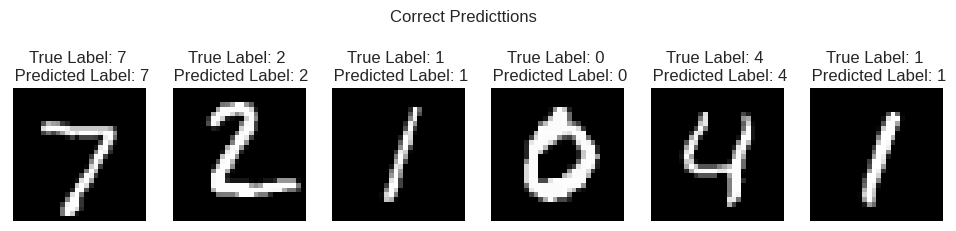

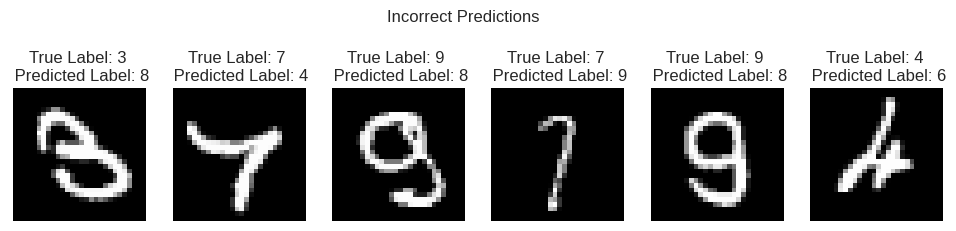

In [ ]:
import torch

# define number of images to display
num_images = 6

def plot_predictions(model, data_loader, num_images):
    """
    Plots correct and incorrect predictions.
    Parameters:
        model (torch.nn.Module): The model to be tested.
        data_loader (torch.utils.data.DataLoader): DataLoader for test data.
        num_images (int): Number of images to display.
    """

    # set the model for evaluation
    model.eval()

    # list to store correct and incorrect predictions
    correct_images, correct_labels = [], []
    incorrect_images, incorrect_labels = [], []

    # disable gradient calculation
    with torch.no_grad():
        # start the test loop
        for images, labels in data_loader:
            outputs = model(images)  # forward pass
            _, predictions = torch.max(outputs, 1)  # calculate predictions

            # store correct and incorrect predictions
            for image, true_label, prediction in zip(images, labels, predictions):
                if true_label == prediction:
                    correct_images.append(image)
                    correct_labels.append((true_label, prediction))
                else:
                    incorrect_images.append(image)
                    incorrect_labels.append((true_label, prediction))

                # breaking loop
                if len(correct_images) >= num_images and len(incorrect_images) >= num_images:
                    break

            # breaking loop
            if len(correct_images) >= num_images and len(incorrect_images) >= num_images:
                    break

    # plot correct predictions
    plt.figure(figsize=(num_images*2, 3))
    for i in range(num_images):
        image = correct_images[i].numpy().transpose((1, 2, 0))
        image = image * 0.5 + 0.5  # reverse normalisation
        plt.subplot(1, num_images, i+1)
        plt.imshow(image.squeeze(), cmap='gray')
        plt.title(f'True Label: {correct_labels[i][0]} \n Predicted Label: {correct_labels[i][0]}')
        plt.axis('off')
    plt.suptitle('Correct Predicttions')
    plt.show()

    # plot incorrect predictions
    plt.figure(figsize=(num_images*2, 3))
    for i in range(num_images):
        image = incorrect_images[i].numpy().transpose((1, 2, 0))
        image = image * 0.5 + 0.5  # reverse normalisation
        plt.subplot(1, num_images, i+1)
        plt.imshow(image.squeeze(), cmap='gray')
        plt.title(f'True Label: {incorrect_labels[i][0]} \n Predicted Label: {incorrect_labels[i][1]}')
        plt.axis('off')
    plt.suptitle('Incorrect Predictions')
    plt.show

# plot correct and incorrect predictions
plot_predictions(model, test_loader, num_images=num_images)